In [1]:
import string
import math
import csv
import random
import matplotlib.pyplot as plt

In [2]:
with open("iris.data.txt") as csvfile:
    lines=csv.reader(csvfile)
    dataset = list(lines)
x=[]
t = []
psum = 0
nsum = 0
oweight1 = []
oweight2 = []
oweight3 = []
i = 0
for i in range(len(dataset)-1):
    x.append([float(dataset[i][0]), float(dataset[i][1]), float(dataset[i][2]), float(dataset[i][3])])
    if (i>=0 and i<50):
        t.append([1, 0, 0])
    elif (i>=50 and i<100):
        t.append([0, 1, 0])
    else:
        t.append([0, 0, 1])
    i+=1

In [3]:
def F(nid):
    #3
    for i in range(4):
        sig = 0
        for j in range(4):
            sig+=x[nid][j]*weight3[j][i]
        e = math.exp(-sig)
        h[nid][i] = 1/(1+e)
        #print(h[nid][i])
    #2
    for i in range(4):
        sig = 0
        for j in range(4):
            sig+=h[nid][j]*weight2[j][i]
        e = math.exp(-sig)
        g[nid][i] = 1/(1+e)
        #print(g[nid][i])
    #1
    for i in range(3):
        sig = 0
        for j in range(4):
            sig+=g[nid][j]*weight1[j][i]
        e = math.exp(-sig)
        y[nid][i] = 1/(1+e)
        #print(y[nid][i])

In [4]:
def S(nid):
    #print(nid)
    #1
    for i in range(3):
        s1[nid][i] = y[nid][i]*(1-y[nid][i])*(t[nid][i]-y[nid][i])
        #print(s1[nid][i])
    #2
    for j in range(4):
        sig = 0
        for i in range(3):
            sig+=s1[nid][i]*weight1[j][i]
        s2[nid][j] =g[nid][j]*(1-g[nid][j])*sig
        #print(s2[nid][j])
   #3
    for j in range(4):
        sig = 0
        for i in range(4):
            sig+=s2[nid][i]*weight2[j][i]
        s3[nid][j] =h[nid][j]*(1-h[nid][j])*sig
        #print(s3[nid][j])

In [5]:
def Weight(lr, nid):
    #1:
    for j in range(4):
        for i in range(3):
            weight1[j][i] = weight1[j][i] + lr*s1[nid][i]*g[nid][j]
    #2
    for j in range(4):
        for i in range(4):
            weight2[j][i] = weight2[j][i] + lr*s2[nid][i]*h[nid][j]
    #3
    for j in range(4):
        for i in range(4):
            weight3[j][i] = weight3[j][i] + lr*s3[nid][i]*x[nid][j]

In [6]:
def Mse():
    sum1 = 0
    for i in range(150):
        F(i)
        m = 0
        for j in range(3):
            m+=pow((y[i][j]-t[i][j]), 2)
        sum1+=(m/3)
    sum1 = sum1/150
    return sum1

In [7]:
for i in range(4):
    oweight1.append([random.uniform(-0.1,0.1), random.uniform(-0.1,0.1), random.uniform(-0.1,0.1)])
    oweight2.append([random.uniform(-0.1,0.1), random.uniform(-0.1,0.1), random.uniform(-0.1,0.1), random.uniform(-0.1,0.1)])
    oweight3.append([random.uniform(-0.1,0.1), random.uniform(-0.1,0.1), random.uniform(-0.1,0.1), random.uniform(-0.1,0.1)])
for k in range(1, 6):
    lr = round((0.1 *k), 1)
    print("learning-rate : ", lr)
    h = []
    g = []
    y = []
    s1 = []
    s2 = []
    s3 = []
    weight1 = oweight1
    weight2 = oweight2
    weight3 = oweight3
    for i in range(150):
        h.append([0, 0, 0, 0])
        g.append([0, 0, 0, 0])
        y.append([0, 0, 0, 0])
        s1.append([0, 0, 0])
        s2.append([0, 0, 0, 0])
        s3.append([0, 0, 0, 0])
    converge = 0
    epoch = 0
    while converge==0:
        epoch+=1
        print("epoch : ", epoch, end=" ")
        nsum = 0
        for i in range(150):
            F(i)
            S(i)
            Weight(lr, i)
        nsum = Mse()
        if epoch>1:
            tmp = (nsum-psum)/psum
            tmp = abs(tmp)
            print("The absolute fraction of change in MSE : ", tmp)
            if tmp<=0.0001:
                converge=1
        else:
            print("The absolute fraction of change in MSE : ", "X")
        psum = nsum
    print("Total epoch : ", epoch)

learning-rate :  0.1
epoch :  1 The absolute fraction of change in MSE :  X
epoch :  2 The absolute fraction of change in MSE :  0.010336543552864275
epoch :  3 The absolute fraction of change in MSE :  0.0001957042730459995
epoch :  4 The absolute fraction of change in MSE :  0.0005365363191883009
epoch :  5 The absolute fraction of change in MSE :  0.0003002017469665554
epoch :  6 The absolute fraction of change in MSE :  9.470924669588906e-05
Total epoch :  6
learning-rate :  0.2
epoch :  1 The absolute fraction of change in MSE :  X
epoch :  2 The absolute fraction of change in MSE :  0.012374025573390464
epoch :  3 The absolute fraction of change in MSE :  0.0017684641069423644
epoch :  4 The absolute fraction of change in MSE :  0.0006208002548707227
epoch :  5 The absolute fraction of change in MSE :  0.0010881470151174377
epoch :  6 The absolute fraction of change in MSE :  0.0011406520329452798
epoch :  7 The absolute fraction of change in MSE :  0.001115065765785388
epoch :  

epoch :  109 The absolute fraction of change in MSE :  0.5496664701339776
epoch :  110 The absolute fraction of change in MSE :  0.013247115620445688
epoch :  111 The absolute fraction of change in MSE :  0.051191518016972554
epoch :  112 The absolute fraction of change in MSE :  0.6327243286131352
epoch :  113 The absolute fraction of change in MSE :  4.718699008066063
epoch :  114 The absolute fraction of change in MSE :  0.5944393877540601
epoch :  115 The absolute fraction of change in MSE :  0.14472837494615262
epoch :  116 The absolute fraction of change in MSE :  0.21202361839435635
epoch :  117 The absolute fraction of change in MSE :  0.25064964948043894
epoch :  118 The absolute fraction of change in MSE :  0.6175408824508326
epoch :  119 The absolute fraction of change in MSE :  0.19567494898386953
epoch :  120 The absolute fraction of change in MSE :  0.08668395788017708
epoch :  121 The absolute fraction of change in MSE :  0.8279759916471755
epoch :  122 The absolute frac

epoch :  246 The absolute fraction of change in MSE :  0.22573498669027484
epoch :  247 The absolute fraction of change in MSE :  2.0922160276670425
epoch :  248 The absolute fraction of change in MSE :  0.7306679674259114
epoch :  249 The absolute fraction of change in MSE :  1.4276856076019449
epoch :  250 The absolute fraction of change in MSE :  0.2835463088440669
epoch :  251 The absolute fraction of change in MSE :  0.052410075241541405
epoch :  252 The absolute fraction of change in MSE :  0.38312206263008003
epoch :  253 The absolute fraction of change in MSE :  0.008007900284306486
epoch :  254 The absolute fraction of change in MSE :  1.830933706179806
epoch :  255 The absolute fraction of change in MSE :  0.6980062719839298
epoch :  256 The absolute fraction of change in MSE :  3.2465775145874374
epoch :  257 The absolute fraction of change in MSE :  0.08748530709124443
epoch :  258 The absolute fraction of change in MSE :  0.6962586163919946
epoch :  259 The absolute fracti

epoch :  378 The absolute fraction of change in MSE :  0.03299965764202359
epoch :  379 The absolute fraction of change in MSE :  0.1613365657041245
epoch :  380 The absolute fraction of change in MSE :  1.43170586390806
epoch :  381 The absolute fraction of change in MSE :  0.665606452784694
epoch :  382 The absolute fraction of change in MSE :  1.022276744831977
epoch :  383 The absolute fraction of change in MSE :  0.49813482992614727
epoch :  384 The absolute fraction of change in MSE :  0.032847847799685
epoch :  385 The absolute fraction of change in MSE :  0.11504867317066324
epoch :  386 The absolute fraction of change in MSE :  0.09732430737448125
epoch :  387 The absolute fraction of change in MSE :  1.7182794430282675
epoch :  388 The absolute fraction of change in MSE :  0.5883842235802784
epoch :  389 The absolute fraction of change in MSE :  0.05800118059802688
epoch :  390 The absolute fraction of change in MSE :  0.7112771461916872
epoch :  391 The absolute fraction of 

epoch :  502 The absolute fraction of change in MSE :  0.6206470482882507
epoch :  503 The absolute fraction of change in MSE :  0.3396983204524722
epoch :  504 The absolute fraction of change in MSE :  0.25250268941106924
epoch :  505 The absolute fraction of change in MSE :  0.2457481889086094
epoch :  506 The absolute fraction of change in MSE :  0.07591623603044884
epoch :  507 The absolute fraction of change in MSE :  0.08418350529767177
epoch :  508 The absolute fraction of change in MSE :  0.09735026009741546
epoch :  509 The absolute fraction of change in MSE :  0.04458295381525422
epoch :  510 The absolute fraction of change in MSE :  0.3006868887569321
epoch :  511 The absolute fraction of change in MSE :  0.2197892173883116
epoch :  512 The absolute fraction of change in MSE :  2.5575554572291104
epoch :  513 The absolute fraction of change in MSE :  0.7296527876188716
epoch :  514 The absolute fraction of change in MSE :  3.1707707530404075
epoch :  515 The absolute fractio

epoch :  629 The absolute fraction of change in MSE :  1.8056893853260163
epoch :  630 The absolute fraction of change in MSE :  0.5422193386762775
epoch :  631 The absolute fraction of change in MSE :  0.2731616146199531
epoch :  632 The absolute fraction of change in MSE :  1.6027461497729836
epoch :  633 The absolute fraction of change in MSE :  0.5684132166952085
epoch :  634 The absolute fraction of change in MSE :  1.1887552929591914
epoch :  635 The absolute fraction of change in MSE :  0.6067730578204618
epoch :  636 The absolute fraction of change in MSE :  1.2239972144678566
epoch :  637 The absolute fraction of change in MSE :  0.3171324199301571
epoch :  638 The absolute fraction of change in MSE :  0.21253221316151358
epoch :  639 The absolute fraction of change in MSE :  0.4955172049328352
epoch :  640 The absolute fraction of change in MSE :  1.6113076167499014
epoch :  641 The absolute fraction of change in MSE :  0.5295814768614496
epoch :  642 The absolute fraction of

epoch :  753 The absolute fraction of change in MSE :  0.07085582970172619
epoch :  754 The absolute fraction of change in MSE :  1.2662561476650875
epoch :  755 The absolute fraction of change in MSE :  0.3153277906217543
epoch :  756 The absolute fraction of change in MSE :  0.5615542403742105
epoch :  757 The absolute fraction of change in MSE :  0.5596477676541295
epoch :  758 The absolute fraction of change in MSE :  0.0014128237365013368
epoch :  759 The absolute fraction of change in MSE :  0.041429280571101394
epoch :  760 The absolute fraction of change in MSE :  0.09362172862507305
epoch :  761 The absolute fraction of change in MSE :  0.18486651261398715
epoch :  762 The absolute fraction of change in MSE :  0.14226513367110827
epoch :  763 The absolute fraction of change in MSE :  0.10631953759342554
epoch :  764 The absolute fraction of change in MSE :  0.2640510698789868
epoch :  765 The absolute fraction of change in MSE :  0.2781148153091942
epoch :  766 The absolute fr

epoch :  874 The absolute fraction of change in MSE :  0.1671431217896046
epoch :  875 The absolute fraction of change in MSE :  0.20241135073247013
epoch :  876 The absolute fraction of change in MSE :  0.17872961381314065
epoch :  877 The absolute fraction of change in MSE :  0.030559535943402934
epoch :  878 The absolute fraction of change in MSE :  0.2007227982907179
epoch :  879 The absolute fraction of change in MSE :  0.1905715840857459
epoch :  880 The absolute fraction of change in MSE :  0.17348736977232598
epoch :  881 The absolute fraction of change in MSE :  0.03258576561220603
epoch :  882 The absolute fraction of change in MSE :  0.21876510203459992
epoch :  883 The absolute fraction of change in MSE :  0.0656832598119618
epoch :  884 The absolute fraction of change in MSE :  0.3772651950651994
epoch :  885 The absolute fraction of change in MSE :  1.352472972921242
epoch :  886 The absolute fraction of change in MSE :  0.3353500924686896
epoch :  887 The absolute fracti

epoch :  998 The absolute fraction of change in MSE :  0.23911522460268378
epoch :  999 The absolute fraction of change in MSE :  0.24297561796747544
epoch :  1000 The absolute fraction of change in MSE :  0.07174217110172289
epoch :  1001 The absolute fraction of change in MSE :  0.4348603895630056
epoch :  1002 The absolute fraction of change in MSE :  0.21415110563485293
epoch :  1003 The absolute fraction of change in MSE :  0.2061797938445758
epoch :  1004 The absolute fraction of change in MSE :  0.3107147318204824
epoch :  1005 The absolute fraction of change in MSE :  0.025954867735848087
epoch :  1006 The absolute fraction of change in MSE :  0.19059761415381668
epoch :  1007 The absolute fraction of change in MSE :  1.3629410215891862
epoch :  1008 The absolute fraction of change in MSE :  0.5691234257608779
epoch :  1009 The absolute fraction of change in MSE :  1.0201420195544115
epoch :  1010 The absolute fraction of change in MSE :  0.5266652289597834
epoch :  1011 The ab

epoch :  1131 The absolute fraction of change in MSE :  0.08920527249605875
epoch :  1132 The absolute fraction of change in MSE :  0.30543942571798605
epoch :  1133 The absolute fraction of change in MSE :  0.19146787114418998
epoch :  1134 The absolute fraction of change in MSE :  0.13918746799631182
epoch :  1135 The absolute fraction of change in MSE :  0.013761563587536699
epoch :  1136 The absolute fraction of change in MSE :  0.01524832013095439
epoch :  1137 The absolute fraction of change in MSE :  0.09141466131687888
epoch :  1138 The absolute fraction of change in MSE :  0.06412529903787832
epoch :  1139 The absolute fraction of change in MSE :  0.02264081634481314
epoch :  1140 The absolute fraction of change in MSE :  0.006072590348200408
epoch :  1141 The absolute fraction of change in MSE :  0.009644085022614487
epoch :  1142 The absolute fraction of change in MSE :  0.007331533597757963
epoch :  1143 The absolute fraction of change in MSE :  0.24613804347301863
epoch : 

epoch :  1258 The absolute fraction of change in MSE :  0.01283106014319031
epoch :  1259 The absolute fraction of change in MSE :  0.9715059260733844
epoch :  1260 The absolute fraction of change in MSE :  0.09436007391610532
epoch :  1261 The absolute fraction of change in MSE :  0.21952977074520802
epoch :  1262 The absolute fraction of change in MSE :  0.26137708126707226
epoch :  1263 The absolute fraction of change in MSE :  0.036265822013891974
epoch :  1264 The absolute fraction of change in MSE :  0.21366988290272204
epoch :  1265 The absolute fraction of change in MSE :  0.08521828504123073
epoch :  1266 The absolute fraction of change in MSE :  0.7089354845184536
epoch :  1267 The absolute fraction of change in MSE :  0.1905818451925706
epoch :  1268 The absolute fraction of change in MSE :  0.2179990233143114
epoch :  1269 The absolute fraction of change in MSE :  0.14987030669154183
epoch :  1270 The absolute fraction of change in MSE :  0.10658499448494693
epoch :  1271 T

epoch :  1381 The absolute fraction of change in MSE :  0.009063432680274474
epoch :  1382 The absolute fraction of change in MSE :  0.014495516932493065
epoch :  1383 The absolute fraction of change in MSE :  0.002222781766371585
epoch :  1384 The absolute fraction of change in MSE :  0.03385479790344125
epoch :  1385 The absolute fraction of change in MSE :  0.026027099618558446
epoch :  1386 The absolute fraction of change in MSE :  0.07955531347486425
epoch :  1387 The absolute fraction of change in MSE :  0.24199208254940746
epoch :  1388 The absolute fraction of change in MSE :  0.31840558616282116
epoch :  1389 The absolute fraction of change in MSE :  0.46472686647337175
epoch :  1390 The absolute fraction of change in MSE :  0.0016347171185365583
epoch :  1391 The absolute fraction of change in MSE :  0.0314310159543225
epoch :  1392 The absolute fraction of change in MSE :  0.007631861648858497
epoch :  1393 The absolute fraction of change in MSE :  0.002886247286310466
epoch

epoch :  1499 The absolute fraction of change in MSE :  0.6688584814482632
epoch :  1500 The absolute fraction of change in MSE :  0.05668657245746456
epoch :  1501 The absolute fraction of change in MSE :  0.23272446993227025
epoch :  1502 The absolute fraction of change in MSE :  0.1665563859378773
epoch :  1503 The absolute fraction of change in MSE :  0.29486515575007693
epoch :  1504 The absolute fraction of change in MSE :  0.01026983889567433
epoch :  1505 The absolute fraction of change in MSE :  0.015473067589767122
epoch :  1506 The absolute fraction of change in MSE :  0.6062181342596649
epoch :  1507 The absolute fraction of change in MSE :  0.2083684194394087
epoch :  1508 The absolute fraction of change in MSE :  0.04060911738142305
epoch :  1509 The absolute fraction of change in MSE :  0.11409159514362205
epoch :  1510 The absolute fraction of change in MSE :  0.16456755976593104
epoch :  1511 The absolute fraction of change in MSE :  0.23275601749592592
epoch :  1512 T

epoch :  1612 The absolute fraction of change in MSE :  0.35372436988453143
epoch :  1613 The absolute fraction of change in MSE :  0.0024858681648138935
epoch :  1614 The absolute fraction of change in MSE :  0.0155003379599407
epoch :  1615 The absolute fraction of change in MSE :  0.22840332474419833
epoch :  1616 The absolute fraction of change in MSE :  0.27073797330333543
epoch :  1617 The absolute fraction of change in MSE :  0.4427276742376235
epoch :  1618 The absolute fraction of change in MSE :  0.45923373666117984
epoch :  1619 The absolute fraction of change in MSE :  0.2021171758902881
epoch :  1620 The absolute fraction of change in MSE :  0.08267335353735439
epoch :  1621 The absolute fraction of change in MSE :  0.06650978213089435
epoch :  1622 The absolute fraction of change in MSE :  0.003175005906115247
epoch :  1623 The absolute fraction of change in MSE :  0.020692248620495565
epoch :  1624 The absolute fraction of change in MSE :  0.002972990687375068
epoch :  1

epoch :  1735 The absolute fraction of change in MSE :  0.0015027645913210036
epoch :  1736 The absolute fraction of change in MSE :  0.33826156089161635
epoch :  1737 The absolute fraction of change in MSE :  0.24331578697769457
epoch :  1738 The absolute fraction of change in MSE :  0.04149174954995902
epoch :  1739 The absolute fraction of change in MSE :  0.3099689814430935
epoch :  1740 The absolute fraction of change in MSE :  0.3913482974129762
epoch :  1741 The absolute fraction of change in MSE :  0.03426827581207683
epoch :  1742 The absolute fraction of change in MSE :  0.3870272202245739
epoch :  1743 The absolute fraction of change in MSE :  0.022813130025134385
epoch :  1744 The absolute fraction of change in MSE :  0.2604927097425949
epoch :  1745 The absolute fraction of change in MSE :  0.3051242334844948
epoch :  1746 The absolute fraction of change in MSE :  0.23479504292169204
epoch :  1747 The absolute fraction of change in MSE :  0.2844684309327675
epoch :  1748 T

epoch :  1855 The absolute fraction of change in MSE :  0.33915941498593327
epoch :  1856 The absolute fraction of change in MSE :  0.05930619014600805
epoch :  1857 The absolute fraction of change in MSE :  0.0507001216036894
epoch :  1858 The absolute fraction of change in MSE :  0.32532967561800363
epoch :  1859 The absolute fraction of change in MSE :  0.04480194173728516
epoch :  1860 The absolute fraction of change in MSE :  0.21127365840075052
epoch :  1861 The absolute fraction of change in MSE :  0.15027250126351316
epoch :  1862 The absolute fraction of change in MSE :  0.1035341854005488
epoch :  1863 The absolute fraction of change in MSE :  1.7391045330177868
epoch :  1864 The absolute fraction of change in MSE :  0.6164382573213683
epoch :  1865 The absolute fraction of change in MSE :  0.011356748979992235
epoch :  1866 The absolute fraction of change in MSE :  0.4905876932749894
epoch :  1867 The absolute fraction of change in MSE :  0.06508385691472304
epoch :  1868 Th

epoch :  11 The absolute fraction of change in MSE :  0.22954309655226535
epoch :  12 The absolute fraction of change in MSE :  0.27497575859979323
epoch :  13 The absolute fraction of change in MSE :  0.5089289257846358
epoch :  14 The absolute fraction of change in MSE :  0.03947382393182954
epoch :  15 The absolute fraction of change in MSE :  0.016085265853666476
epoch :  16 The absolute fraction of change in MSE :  0.023052918788880883
epoch :  17 The absolute fraction of change in MSE :  1.2282072435221507
epoch :  18 The absolute fraction of change in MSE :  0.050577025555087606
epoch :  19 The absolute fraction of change in MSE :  0.11677163195958096
epoch :  20 The absolute fraction of change in MSE :  0.443397189069686
epoch :  21 The absolute fraction of change in MSE :  0.03624783278423846
epoch :  22 The absolute fraction of change in MSE :  0.10083720024982812
epoch :  23 The absolute fraction of change in MSE :  0.29791995964439066
epoch :  24 The absolute fraction of ch

epoch :  140 The absolute fraction of change in MSE :  0.1617741321050562
epoch :  141 The absolute fraction of change in MSE :  0.07353554206223874
epoch :  142 The absolute fraction of change in MSE :  0.0741280385720283
epoch :  143 The absolute fraction of change in MSE :  0.07940278165051427
epoch :  144 The absolute fraction of change in MSE :  0.1561429576355566
epoch :  145 The absolute fraction of change in MSE :  0.21380081005820675
epoch :  146 The absolute fraction of change in MSE :  0.01987416929691134
epoch :  147 The absolute fraction of change in MSE :  0.2141252011833834
epoch :  148 The absolute fraction of change in MSE :  0.1510432772245142
epoch :  149 The absolute fraction of change in MSE :  0.00473792071893045
epoch :  150 The absolute fraction of change in MSE :  0.4501194935946142
epoch :  151 The absolute fraction of change in MSE :  0.010545463610527786
epoch :  152 The absolute fraction of change in MSE :  0.44071555931835227
epoch :  153 The absolute frac

epoch :  263 The absolute fraction of change in MSE :  0.07331563524185283
epoch :  264 The absolute fraction of change in MSE :  0.9503396500892468
epoch :  265 The absolute fraction of change in MSE :  0.05883649210004437
epoch :  266 The absolute fraction of change in MSE :  0.42734493313069793
epoch :  267 The absolute fraction of change in MSE :  0.13772981840729773
epoch :  268 The absolute fraction of change in MSE :  0.0015039838910287766
epoch :  269 The absolute fraction of change in MSE :  0.17787057481552224
epoch :  270 The absolute fraction of change in MSE :  0.1610862977511181
epoch :  271 The absolute fraction of change in MSE :  0.0575550428269012
epoch :  272 The absolute fraction of change in MSE :  1.2529765113661921
epoch :  273 The absolute fraction of change in MSE :  0.06053830894669487
epoch :  274 The absolute fraction of change in MSE :  0.43690950035865317
epoch :  275 The absolute fraction of change in MSE :  0.1871853397607962
epoch :  276 The absolute fr

epoch :  16 The absolute fraction of change in MSE :  0.8668524684908334
epoch :  17 The absolute fraction of change in MSE :  0.5648232897281269
epoch :  18 The absolute fraction of change in MSE :  0.3689057963812515
epoch :  19 The absolute fraction of change in MSE :  0.34038067154996127
epoch :  20 The absolute fraction of change in MSE :  1.327338093650135
epoch :  21 The absolute fraction of change in MSE :  0.5562950778173656
epoch :  22 The absolute fraction of change in MSE :  0.45990542162494147
epoch :  23 The absolute fraction of change in MSE :  0.2835648816473995
epoch :  24 The absolute fraction of change in MSE :  2.400911629796612
epoch :  25 The absolute fraction of change in MSE :  0.8472529756918458
epoch :  26 The absolute fraction of change in MSE :  0.20402441784670217
epoch :  27 The absolute fraction of change in MSE :  0.39038878186193104
epoch :  28 The absolute fraction of change in MSE :  1.4080388195245128
epoch :  29 The absolute fraction of change in MS

epoch :  137 The absolute fraction of change in MSE :  0.03958147323103483
epoch :  138 The absolute fraction of change in MSE :  0.0002813664978997034
epoch :  139 The absolute fraction of change in MSE :  0.039069488339241086
epoch :  140 The absolute fraction of change in MSE :  0.06561118296475839
epoch :  141 The absolute fraction of change in MSE :  0.750068988947181
epoch :  142 The absolute fraction of change in MSE :  0.3872209226439125
epoch :  143 The absolute fraction of change in MSE :  0.7683029833286892
epoch :  144 The absolute fraction of change in MSE :  0.44637803346174065
epoch :  145 The absolute fraction of change in MSE :  0.12156534889663353
epoch :  146 The absolute fraction of change in MSE :  0.0857784374781646
epoch :  147 The absolute fraction of change in MSE :  0.11458229094561133
epoch :  148 The absolute fraction of change in MSE :  0.18718076453603769
epoch :  149 The absolute fraction of change in MSE :  0.26273019154473753
epoch :  150 The absolute f

epoch :  253 The absolute fraction of change in MSE :  0.0021145863379959263
epoch :  254 The absolute fraction of change in MSE :  0.0015002105604489723
epoch :  255 The absolute fraction of change in MSE :  0.0018639443758381613
epoch :  256 The absolute fraction of change in MSE :  0.0016804617644138992
epoch :  257 The absolute fraction of change in MSE :  0.0018253189025633587
epoch :  258 The absolute fraction of change in MSE :  0.0017657006666165586
epoch :  259 The absolute fraction of change in MSE :  0.0018399847523321684
epoch :  260 The absolute fraction of change in MSE :  0.0018229129528343753
epoch :  261 The absolute fraction of change in MSE :  0.0018704215720542101
epoch :  262 The absolute fraction of change in MSE :  0.0018701633320385106
epoch :  263 The absolute fraction of change in MSE :  0.0019059147756684016
epoch :  264 The absolute fraction of change in MSE :  0.0019129958364012814
epoch :  265 The absolute fraction of change in MSE :  0.0019428627838607765

epoch :  380 The absolute fraction of change in MSE :  1.0984019503771174
epoch :  381 The absolute fraction of change in MSE :  0.5067624037200764
epoch :  382 The absolute fraction of change in MSE :  0.9165779036010455
epoch :  383 The absolute fraction of change in MSE :  0.45507127586482776
epoch :  384 The absolute fraction of change in MSE :  0.9355816571286696
epoch :  385 The absolute fraction of change in MSE :  0.4862022661180063
epoch :  386 The absolute fraction of change in MSE :  0.8062509043925443
epoch :  387 The absolute fraction of change in MSE :  0.492829340643119
epoch :  388 The absolute fraction of change in MSE :  0.20281340715077797
epoch :  389 The absolute fraction of change in MSE :  0.18482161913065617
epoch :  390 The absolute fraction of change in MSE :  0.0843053665129507
epoch :  391 The absolute fraction of change in MSE :  0.7304863761424557
epoch :  392 The absolute fraction of change in MSE :  0.16210816459668878
epoch :  393 The absolute fraction 

epoch :  510 The absolute fraction of change in MSE :  0.38292928251629105
epoch :  511 The absolute fraction of change in MSE :  0.3197628109980193
epoch :  512 The absolute fraction of change in MSE :  0.06945870290465253
epoch :  513 The absolute fraction of change in MSE :  0.41127055383628935
epoch :  514 The absolute fraction of change in MSE :  0.5423986914612936
epoch :  515 The absolute fraction of change in MSE :  0.4297918324659775
epoch :  516 The absolute fraction of change in MSE :  0.13262934441742813
epoch :  517 The absolute fraction of change in MSE :  0.10064734554622823
epoch :  518 The absolute fraction of change in MSE :  0.19168683353183988
epoch :  519 The absolute fraction of change in MSE :  0.0027627115390621423
epoch :  520 The absolute fraction of change in MSE :  0.0046938427130865145
epoch :  521 The absolute fraction of change in MSE :  0.05756147980149577
epoch :  522 The absolute fraction of change in MSE :  1.4018059167819998
epoch :  523 The absolute

epoch :  638 The absolute fraction of change in MSE :  0.18315317120644956
epoch :  639 The absolute fraction of change in MSE :  0.3003723075511353
epoch :  640 The absolute fraction of change in MSE :  0.022149376665244264
epoch :  641 The absolute fraction of change in MSE :  0.03493134499261203
epoch :  642 The absolute fraction of change in MSE :  0.03452882785821931
epoch :  643 The absolute fraction of change in MSE :  0.21622744528719667
epoch :  644 The absolute fraction of change in MSE :  0.37967451023424437
epoch :  645 The absolute fraction of change in MSE :  0.07928873662084587
epoch :  646 The absolute fraction of change in MSE :  0.4847821416463847
epoch :  647 The absolute fraction of change in MSE :  0.47075851296087967
epoch :  648 The absolute fraction of change in MSE :  0.04635296642709282
epoch :  649 The absolute fraction of change in MSE :  0.008672187852977051
epoch :  650 The absolute fraction of change in MSE :  0.848535541003192
epoch :  651 The absolute f

epoch :  769 The absolute fraction of change in MSE :  0.08559759994189475
epoch :  770 The absolute fraction of change in MSE :  0.158191196369166
epoch :  771 The absolute fraction of change in MSE :  0.1328999658997821
epoch :  772 The absolute fraction of change in MSE :  0.000644591330641725
epoch :  773 The absolute fraction of change in MSE :  0.13395780483234854
epoch :  774 The absolute fraction of change in MSE :  0.4571200205368078
epoch :  775 The absolute fraction of change in MSE :  0.27863851358030134
epoch :  776 The absolute fraction of change in MSE :  0.17230722019131936
epoch :  777 The absolute fraction of change in MSE :  0.01282545611392146
epoch :  778 The absolute fraction of change in MSE :  0.04577179213804897
epoch :  779 The absolute fraction of change in MSE :  0.010372761716428078
epoch :  780 The absolute fraction of change in MSE :  0.011908841973344292
epoch :  781 The absolute fraction of change in MSE :  0.04885410976985668
epoch :  782 The absolute 

epoch :  905 The absolute fraction of change in MSE :  0.018345005542481974
epoch :  906 The absolute fraction of change in MSE :  0.025506334075963404
epoch :  907 The absolute fraction of change in MSE :  0.05418876054386387
epoch :  908 The absolute fraction of change in MSE :  0.03781681015125058
epoch :  909 The absolute fraction of change in MSE :  0.05721761372372945
epoch :  910 The absolute fraction of change in MSE :  0.04256572903132976
epoch :  911 The absolute fraction of change in MSE :  0.024878973864119594
epoch :  912 The absolute fraction of change in MSE :  0.0232097708311898
epoch :  913 The absolute fraction of change in MSE :  0.10228681638645536
epoch :  914 The absolute fraction of change in MSE :  0.09901618165913527
epoch :  915 The absolute fraction of change in MSE :  0.034788727069805875
epoch :  916 The absolute fraction of change in MSE :  0.012736290652285324
epoch :  917 The absolute fraction of change in MSE :  0.00701019831733853
epoch :  918 The abso

epoch :  1040 The absolute fraction of change in MSE :  0.17087815081323524
epoch :  1041 The absolute fraction of change in MSE :  0.3600050775850824
epoch :  1042 The absolute fraction of change in MSE :  0.19264253140733498
epoch :  1043 The absolute fraction of change in MSE :  0.0005099576506013892
epoch :  1044 The absolute fraction of change in MSE :  0.05714831966955132
epoch :  1045 The absolute fraction of change in MSE :  0.04440616584552396
epoch :  1046 The absolute fraction of change in MSE :  0.04111575758476272
epoch :  1047 The absolute fraction of change in MSE :  0.020219527941337242
epoch :  1048 The absolute fraction of change in MSE :  0.10972393729734069
epoch :  1049 The absolute fraction of change in MSE :  0.36521237960642783
epoch :  1050 The absolute fraction of change in MSE :  0.24763065816512353
epoch :  1051 The absolute fraction of change in MSE :  0.12714682843688063
epoch :  1052 The absolute fraction of change in MSE :  0.12864912420164723
epoch :  1

epoch :  1176 The absolute fraction of change in MSE :  0.07985671415191922
epoch :  1177 The absolute fraction of change in MSE :  0.12130269485964013
epoch :  1178 The absolute fraction of change in MSE :  0.9636676142524924
epoch :  1179 The absolute fraction of change in MSE :  0.510858182657106
epoch :  1180 The absolute fraction of change in MSE :  1.2557059057474909
epoch :  1181 The absolute fraction of change in MSE :  0.3299152728974322
epoch :  1182 The absolute fraction of change in MSE :  0.1190519232418761
epoch :  1183 The absolute fraction of change in MSE :  0.12495868536543019
epoch :  1184 The absolute fraction of change in MSE :  0.1878463050768767
epoch :  1185 The absolute fraction of change in MSE :  1.0477532328771373
epoch :  1186 The absolute fraction of change in MSE :  0.4407750506735144
epoch :  1187 The absolute fraction of change in MSE :  0.5745600944093068
epoch :  1188 The absolute fraction of change in MSE :  0.004118624903487632
epoch :  1189 The abs

epoch :  1287 The absolute fraction of change in MSE :  0.016055990151766196
epoch :  1288 The absolute fraction of change in MSE :  0.09870269473838114
epoch :  1289 The absolute fraction of change in MSE :  0.2547767682097971
epoch :  1290 The absolute fraction of change in MSE :  0.1975847795574944
epoch :  1291 The absolute fraction of change in MSE :  0.041484472926050835
epoch :  1292 The absolute fraction of change in MSE :  0.07345786227119293
epoch :  1293 The absolute fraction of change in MSE :  0.000240730492409127
epoch :  1294 The absolute fraction of change in MSE :  0.029866732051903388
epoch :  1295 The absolute fraction of change in MSE :  0.008005441834833737
epoch :  1296 The absolute fraction of change in MSE :  0.01849129087034262
epoch :  1297 The absolute fraction of change in MSE :  0.007012397340720427
epoch :  1298 The absolute fraction of change in MSE :  0.06540739930039756
epoch :  1299 The absolute fraction of change in MSE :  0.15789108935403667
epoch : 

epoch :  1395 The absolute fraction of change in MSE :  0.05498591497385745
epoch :  1396 The absolute fraction of change in MSE :  0.007453820015174767
epoch :  1397 The absolute fraction of change in MSE :  0.004230337116993337
epoch :  1398 The absolute fraction of change in MSE :  0.10581580102350382
epoch :  1399 The absolute fraction of change in MSE :  0.02183617186946896
epoch :  1400 The absolute fraction of change in MSE :  0.05613449569285502
epoch :  1401 The absolute fraction of change in MSE :  0.04035046533070385
epoch :  1402 The absolute fraction of change in MSE :  0.026019107866464688
epoch :  1403 The absolute fraction of change in MSE :  0.03643349377544119
epoch :  1404 The absolute fraction of change in MSE :  0.016032570724526123
epoch :  1405 The absolute fraction of change in MSE :  0.5454274750219404
epoch :  1406 The absolute fraction of change in MSE :  0.10339293843205816
epoch :  1407 The absolute fraction of change in MSE :  0.2831437269180245
epoch :  1

epoch :  1527 The absolute fraction of change in MSE :  0.0012218882346673255
epoch :  1528 The absolute fraction of change in MSE :  0.021122604172327246
epoch :  1529 The absolute fraction of change in MSE :  0.16743565562261167
epoch :  1530 The absolute fraction of change in MSE :  0.08308932723059964
epoch :  1531 The absolute fraction of change in MSE :  0.0008024107931488913
epoch :  1532 The absolute fraction of change in MSE :  0.23127187486493822
epoch :  1533 The absolute fraction of change in MSE :  0.07781399043876244
epoch :  1534 The absolute fraction of change in MSE :  0.19514841579706954
epoch :  1535 The absolute fraction of change in MSE :  0.06901912892132027
epoch :  1536 The absolute fraction of change in MSE :  0.3677887658422125
epoch :  1537 The absolute fraction of change in MSE :  0.24500534392006093
epoch :  1538 The absolute fraction of change in MSE :  0.1045496493354842
epoch :  1539 The absolute fraction of change in MSE :  0.0393735615752239
epoch :  1

epoch :  18 The absolute fraction of change in MSE :  0.5008355496168853
epoch :  19 The absolute fraction of change in MSE :  0.0643344721760128
epoch :  20 The absolute fraction of change in MSE :  0.5283335713329553
epoch :  21 The absolute fraction of change in MSE :  0.38740409823931493
epoch :  22 The absolute fraction of change in MSE :  0.5481552189921157
epoch :  23 The absolute fraction of change in MSE :  0.23202984581673267
epoch :  24 The absolute fraction of change in MSE :  0.14850134198347986
epoch :  25 The absolute fraction of change in MSE :  0.30049660949604023
epoch :  26 The absolute fraction of change in MSE :  0.23876964834198555
epoch :  27 The absolute fraction of change in MSE :  0.11969194978389414
epoch :  28 The absolute fraction of change in MSE :  0.0820802174165503
epoch :  29 The absolute fraction of change in MSE :  0.12065356678439222
epoch :  30 The absolute fraction of change in MSE :  0.27201287586013906
epoch :  31 The absolute fraction of change

epoch :  155 The absolute fraction of change in MSE :  0.23123693259605058
epoch :  156 The absolute fraction of change in MSE :  0.14248761850496494
epoch :  157 The absolute fraction of change in MSE :  0.20971165933368072
epoch :  158 The absolute fraction of change in MSE :  0.15590153994956843
epoch :  159 The absolute fraction of change in MSE :  0.1068849513932223
epoch :  160 The absolute fraction of change in MSE :  0.061374760529340745
epoch :  161 The absolute fraction of change in MSE :  0.5413837143369339
epoch :  162 The absolute fraction of change in MSE :  0.3590700878491948
epoch :  163 The absolute fraction of change in MSE :  0.9216157726636195
epoch :  164 The absolute fraction of change in MSE :  0.5740052702923085
epoch :  165 The absolute fraction of change in MSE :  0.11570626671428616
epoch :  166 The absolute fraction of change in MSE :  0.16207705337782433
epoch :  167 The absolute fraction of change in MSE :  0.18467090484511262
epoch :  168 The absolute fra

epoch :  282 The absolute fraction of change in MSE :  0.06307072457414135
epoch :  283 The absolute fraction of change in MSE :  0.22265467489577845
epoch :  284 The absolute fraction of change in MSE :  0.13518969357338292
epoch :  285 The absolute fraction of change in MSE :  0.038149652116544044
epoch :  286 The absolute fraction of change in MSE :  0.11343665820878197
epoch :  287 The absolute fraction of change in MSE :  0.3570186495378816
epoch :  288 The absolute fraction of change in MSE :  0.23052968394887607
epoch :  289 The absolute fraction of change in MSE :  0.13075307774323897
epoch :  290 The absolute fraction of change in MSE :  0.07270556200673302
epoch :  291 The absolute fraction of change in MSE :  0.13891965599454753
epoch :  292 The absolute fraction of change in MSE :  0.43944644793802723
epoch :  293 The absolute fraction of change in MSE :  0.15968239612818766
epoch :  294 The absolute fraction of change in MSE :  0.11964009952204464
epoch :  295 The absolute

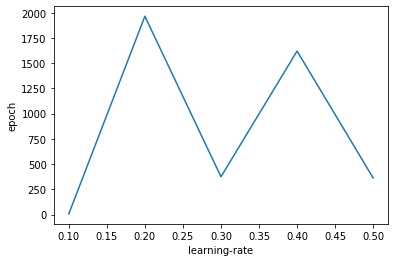

In [8]:
plt.plot([0.1, 0.2, 0.3, 0.4, 0.5], [6, 1965, 374, 1620, 362])
plt.ylabel('epoch')
plt.xlabel('learning-rate')
plt.show()